## Project 2 cosine similarity example

In [50]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [45]:
def cosine_similarity_text(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2]).toarray()
    v1, v2 = vectors[0], vectors[1]
    cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))
    return cosine_sim

text1 = 'the red dress in the photo resembles the red dress'
text2 = 'she wore a dress and red earrings'

cosine_sim = cosine_similarity_text(text1, text2)
print(cosine_sim)

0.2257648460026161


#### Attempting to recereate cosine similarity without packages

In [10]:
text_example = ["As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun",
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure"
]

In [21]:
def create_vector(sentence):
    pieces = sentence.split(" ")
    Voc = set()
    for p in pieces:
        Voc.add(p.lower().strip(","))
    return Voc

create_vector(text_example[0])

{'ahead',
 'as',
 'blossoms',
 'days',
 'encourages',
 'first',
 'longer',
 'of',
 'open',
 'season',
 'signaling',
 'spring',
 'the',
 'to',
 'unfolds',
 'warmth'}

In [22]:
def unique_set(list_sentences):
    unique_words = set()
    for sent in list_sentences:
        set1 = create_vector(sent)
        unique_words = unique_words | set1
    return unique_words
unique_set(text_example)

{'a',
 'activities',
 'adventures',
 'ahead',
 'allowing',
 'also',
 'and',
 'anticipation',
 'are',
 'arrival',
 'arrives',
 'as',
 'awaited',
 'beach',
 'began',
 'begin',
 'blooming',
 'blossoms',
 'brings',
 'but',
 'cold',
 'continuation',
 'continues',
 'culminating',
 'daylight',
 'days',
 'during',
 'eager',
 'encourages',
 'enjoy',
 'enjoying',
 'even',
 'extended',
 'families',
 'filled',
 'first',
 'flowers',
 'for',
 'from',
 'full',
 'fun',
 'gardens',
 'grow',
 'growth',
 'hours',
 'in',
 'into',
 'invites',
 'inviting',
 'is',
 'leisure',
 'life',
 'longer',
 'marks',
 'mild',
 'more',
 'much',
 'not',
 'of',
 'often',
 'only',
 'open',
 'outdoor',
 'outdoors',
 'pattern',
 'peak',
 'people',
 'planned',
 'planning',
 'pleasant',
 'promise',
 'season',
 "season's",
 'seasonal',
 'signaling',
 'since',
 'spending',
 'spring',
 'start',
 'starts',
 'summer',
 'sunlight',
 'sunny',
 'swimming',
 'synonymous',
 'temperatures',
 'that',
 'the',
 'their',
 'time',
 'to',
 'tra

In [30]:
"""Set dataframe with the unique words as columns and create rows 
for each sentence

Each row should have a count under each column with how many it has 
of each unqie word
"""
def create_dataframe(list_sent):
    headers = unique_set(list_sent)
    all_sentences = []
    for sentence in list_sent:
        indv_count = []
        clean_sent = sentence.lower().strip(",")
        for word in headers:
            if word in clean_sent:
                indv_count.append(clean_sent.count(word))
            else:
                indv_count.append(0) 
        all_sentences.append(indv_count)  
        df = pd.DataFrame(all_sentences,columns=headers)
    return df
create_dataframe(text_example)

,much,but,first,brings,culminating,swimming,activities,winter,longer,awaited,...,gardens,enjoying,temperatures,are,summer,spring,marks,days,season's,peak
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
9,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,2,1,0,1,0,1


In [33]:
def cosine(v1, v2):
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cosine_sim = np.dot(v1, v2) / (norm_v1 * norm_v2)
    return cosine_sim

In [64]:
def cosine_all(list_str):
    df = create_dataframe(list_str)
    all_scores = []

    for index, row in df.iterrows():
        scores = []

        for index2, row2 in df.iterrows():
            v1 = np.array(row)
            v2 = np.array(row2)
            score = cosine(v1, v2)
            scores.append(score)

        all_scores.append(scores)

    df_scores = pd.DataFrame(all_scores, columns=range(1, len(df) + 1), index=range(1, len(df) + 1))
    return df_scores
cosine_all(text_example)

much           0
but            0
first          1
brings         0
culminating    0
              ..
spring         1
marks          0
days           1
season's       0
peak           0
Name: 0, Length: 102, dtype: int64
much           0
but            1
first          0
brings         1
culminating    0
              ..
spring         1
marks          0
days           1
season's       0
peak           0
Name: 1, Length: 102, dtype: int64
much           0
but            0
first          0
brings         0
culminating    0
              ..
spring         1
marks          0
days           0
season's       0
peak           0
Name: 2, Length: 102, dtype: int64
much           0
but            0
first          0
brings         0
culminating    0
              ..
spring         1
marks          1
days           0
season's       0
peak           0
Name: 3, Length: 102, dtype: int64
much           0
but            0
first          0
brings         0
culminating    0
              ..
spring    

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.784063,0.896386,0.726752,0.804166,0.766341,0.804030,0.856052,0.779063,0.862440
2,0.784063,1.000000,0.804917,0.653393,0.788954,0.709211,0.788013,0.850184,0.816362,0.843540
3,0.896386,0.804917,1.000000,0.757054,0.831159,0.785207,0.853486,0.904668,0.830226,0.893765
4,0.726752,0.653393,0.757054,1.000000,0.695322,0.555114,0.701197,0.788041,0.756691,0.696895
5,0.804166,0.788954,0.831159,0.695322,1.000000,0.733613,0.845520,0.864923,0.807358,0.853595
6,0.766341,0.709211,0.785207,0.555114,0.733613,1.000000,0.727273,0.720555,0.663237,0.758070
7,0.804030,0.788013,0.853486,0.701197,0.845520,0.727273,1.000000,0.892628,0.817992,0.855032
8,0.856052,0.850184,0.904668,0.788041,0.864923,0.720555,0.892628,1.000000,0.870916,0.907225
9,0.779063,0.816362,0.830226,0.756691,0.807358,0.663237,0.817992,0.870916,1.000000,0.861741
10,0.862440,0.843540,0.893765,0.696895,0.853595,0.758070,0.855032,0.907225,0.861741,1.000000


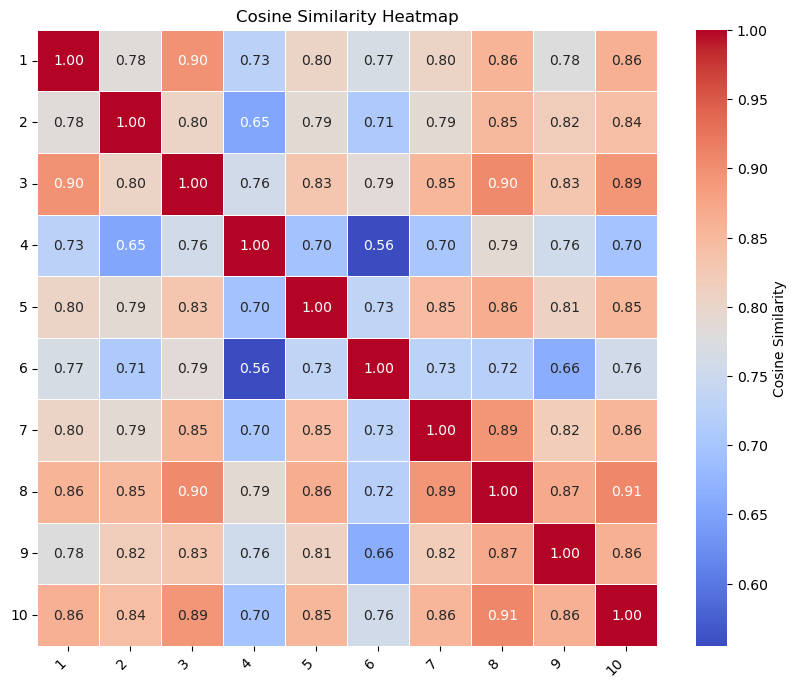

In [57]:
def creat_heatmap(text_example):
    result_df = cosine_all(text_example)
    plt.figure(figsize=(10, 8))
    sns.heatmap(result_df, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", annot_kws={"size": 10}, cbar_kws={'label': 'Cosine Similarity'})
    plt.title("Cosine Similarity Heatmap")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()
creat_heatmap(text_example)

In [60]:
#what numbers mean: 

for index, sentence in enumerate(text_example):
    print(f"{index+1} ==> {sentence}")

1 ==> As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead
2 ==> Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities
3 ==> With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth
4 ==> The mild spring weather marks the transition from the cold winter to the inviting warmth of summer
5 ==> During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun
6 ==> Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight
7 ==> The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring
8 ==> As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring
9 ==> The transition into summer brin